<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li></ul></div>

# Libraries

In [1]:
import os
import sys
import networkx as nx
import osmnx as ox
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import warnings; warnings.simplefilter('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = 15

In [2]:
# Specify file path of the Santiago convex hull
santiago_convexhull_path = '../../Air_pollution/02_data/santiago_convex_hull.shp'

# Get graph (drive + service roads) from OSM
# define coordinate system as EPSG: 4326, WGS84 - World Geodetic System 1984, used in GPS
crs_lonlat = {'init': 'epsg:' + str(4326)}

# Read convex hull boundary file
bnd = gpd.read_file(santiago_convexhull_path).to_crs(crs_lonlat)

Simple plot of the boundary

<AxesSubplot:>

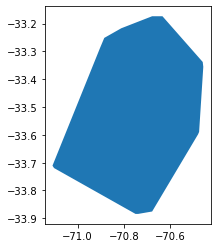

In [4]:
bnd.plot()

Extracting network from OSM database using OSMnx

In [5]:
G = ox.graph_from_polygon(bnd.geometry[0], network_type='all_private')

In [7]:
# Save graph file as .pk
with open('../../Air_pollution/02_data/santiago_osmnx_all_private_graph.pk', 'wb') as handle:
    pickle.dump(G, handle, protocol=2)

In [25]:
# Save as shapefile
ox.io.save_graph_shapefile(G, filepath=G_shp_out_dir)